# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import random
df = pd.read_csv('DATA/matches2020.csv')
df

,Unnamed: 0,gameid,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,0,ESPORTSTMNT03/1241318,KeSPA,SANDBOX Gaming,T1,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,1,ESPORTSTMNT03/1241322,KeSPA,T1,SANDBOX Gaming,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,2,ESPORTSTMNT03/1241324,KeSPA,T1,SANDBOX Gaming,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,3,ESPORTSTMNT03/1241328,KeSPA,T1,SANDBOX Gaming,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,4,ESPORTSTMNT03/1241386,KeSPA,DRX,Afreeca Freecs,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,5607,ESPORTSTMNT03/1433741,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,5608,ESPORTSTMNT03/1433748,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,5609,ESPORTSTMNT03/1433749,LCS,Team SoloMid,FlyQuest,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,5610,ESPORTSTMNT03/1433751,LCS,FlyQuest,Team SoloMid,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


In [2]:
df.dtypes
df = df.drop(columns=["Unnamed: 0","gameid","league","blueteam","redteam"])
df.count()

bluetop        5612
bluejungle     5612
bluemid        5612
blueadc        5612
bluesupport    5612
redtop         5612
redjungle      5612
redmid         5612
redadc         5612
redsupport     5612
result         5612
dtype: int64

In [3]:
df = df.dropna()
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...
5607,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


### Unique Blue Teams

In [4]:

bluet = df[['bluetop','bluejungle','bluemid','blueadc','bluesupport']]
bluet

redt = df[['redtop','redjungle','redmid','redadc','redsupport']]
redt = redt.rename(columns={'redtop': 'bluetop', 'redjungle': 'bluejungle','redmid':'bluemid','redadc':'blueadc','redsupport':'bluesupport'})
allt = redt.append(bluet)
allt.groupby(['bluetop','bluejungle','bluemid','blueadc','bluesupport']).ngroups
allt

,bluetop,bluejungle,bluemid,blueadc,bluesupport
0,Aatrox,Gragas,Mordekaiser,Xayah,Rakan
1,Aatrox,Elise,Qiyana,Varus,TahmKench
2,Aatrox,Sejuani,Azir,MissFortune,Nautilus
3,Quinn,Olaf,Orianna,MissFortune,Leona
4,Renekton,Elise,Velkoz,Varus,Braum
...,...,...,...,...,...
5607,Ornn,Graves,Viktor,Caitlyn,Lux
5608,Ornn,Graves,Azir,Caitlyn,Pantheon
5609,Jayce,Sett,TwistedFate,Ashe,Bard
5610,Ornn,Volibear,Azir,Caitlyn,Pantheon


### Unique Red Teams

In [5]:
df.groupby(['redtop','redjungle','redmid','redadc','redsupport']).ngroups

5489

In [6]:
df.groupby(['redtop','redjungle','redmid','redadc','redsupport']).ngroups

5489

### Unique Champions

In [7]:
topb = df['bluetop']
topr = df['redtop']
midb = df['bluemid']
midr = df['redmid']
jngb = df['bluejungle']
jngr = df['redjungle']
adcb = df['blueadc']
adcr = df['redadc']
supb = df['bluesupport']
supr = df['redsupport']
uni = df['redtop'].append(topb)
uni = uni.append(midb)
uni = uni.append(midr)
uni = uni.append(jngb)
uni = uni.append(jngr)
uni = uni.append(adcb)
uni = uni.append(adcr)
uni = uni.append(supb)
uni = uni.append(supr)
uni.nunique()
uni = uni.drop_duplicates()
uni

0           Aatrox
3            Quinn
4         Renekton
5         Vladimir
7           Irelia
           ...    
86      Blitzcrank
95         Alistar
100           Zyra
2364          Nami
1166         Brand
Length: 147, dtype: object

### Win Rate by Champion

In [8]:
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...
5607,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


In [9]:
bluewins = df.query('result == 1 & (bluetop == "Rumble" | bluejungle == "Rumble" | bluemid == "Rumble" | blueadc == "Rumble" | bluesupport == "Rumble")').count()

In [10]:
redwins = df.query('result == 0 & (redtop == "Rumble" | redjungle == "Rumble" | redmid == "Rumble" | redadc == "Rumble" | redsupport == "Rumble")').count()

In [11]:
bluelosses = df.query('result == 0 & (bluetop == "Rumble" | bluejungle == "Rumble" | bluemid == "Rumble" | blueadc == "Rumble" | bluesupport == "Rumble")').count()

In [12]:
redlosses = df.query('result == 1 & (redtop == "Rumble" | redjungle == "Rumble" | redmid == "Rumble" | redadc == "Rumble" | redsupport == "Rumble")').count()

In [13]:
winrate = (bluewins+redwins)/(bluelosses+redlosses)

In [14]:
champs = []
winrates = []
totalplayed = []
for item in uni:
    champs.append(item)
    bluewins = df.query('result == 1 & (bluetop == "'+item+'" | bluejungle == "'+item+'" | bluemid == "'+item+'" | blueadc == "'+item+'" | bluesupport == "'+item+'")').count()
    redwins = df.query('result == 0 & (redtop == "'+item+'" | redjungle == "'+item+'" | redmid == "'+item+'" | redadc == "'+item+'" | redsupport == "'+item+'")').count()
    bluelosses = df.query('result == 0 & (bluetop == "'+item+'" | bluejungle == "'+item+'" | bluemid == "'+item+'" | blueadc == "'+item+'" | bluesupport == "'+item+'")').count()
    redlosses = df.query('result == 1 & (redtop == "'+item+'" | redjungle == "'+item+'" | redmid == "'+item+'" | redadc == "'+item+'" | redsupport == "'+item+'")').count()
    winrate = (bluewins+redwins)/(bluelosses+redlosses+bluewins+redwins)[0]
    winrates.append(winrate[0])
    totalplayed.append((bluelosses+redlosses+bluewins+redwins)[0])
    
print(winrates, totalplayed)



[0.4769736842105263, 0.43478260869565216, 0.5274151436031331, 0.515625, 0.48905109489051096, 0.5463917525773195, 0.4823529411764706, 0.48598130841121495, 0.49937421777221525, 0.4919210053859964, 0.4672364672364672, 0.4730941704035874, 0.5758683729433273, 0.4552238805970149, 0.6666666666666666, 0.5333333333333333, 0.5535714285714286, 0.4782608695652174, 0.6153846153846154, 0.5050301810865191, 0.5069637883008357, 0.5049559471365639, 0.46601941747572817, 0.4863883847549909, 0.5064935064935064, 1.0, 0.43489254108723135, 0.5617977528089888, 0.4235294117647059, 0.4717868338557994, 0.5161290322580645, 0.45652173913043476, 0.35294117647058826, 0.5474452554744526, 0.4662309368191721, 0.5153203342618384, 0.46153846153846156, 0.4489795918367347, 0.5575221238938053, 0.5757575757575758, 0.4, 0.2222222222222222, 0.4583333333333333, 0.4, 0.5, 0.456, 0.4930555555555556, 0.4690265486725664, 0.4782608695652174, 0.4899328859060403, 0.4728682170542636, 0.5172413793103449, 0.5057232049947971, 0.38709677419

In [15]:
ch_wr_gp = (champs, winrates, totalplayed)
d = {'champ': champs, 'winrate': winrates, 'totalplayed':totalplayed}
new = pd.DataFrame(data=d)
new = new.sort_values('totalplayed')

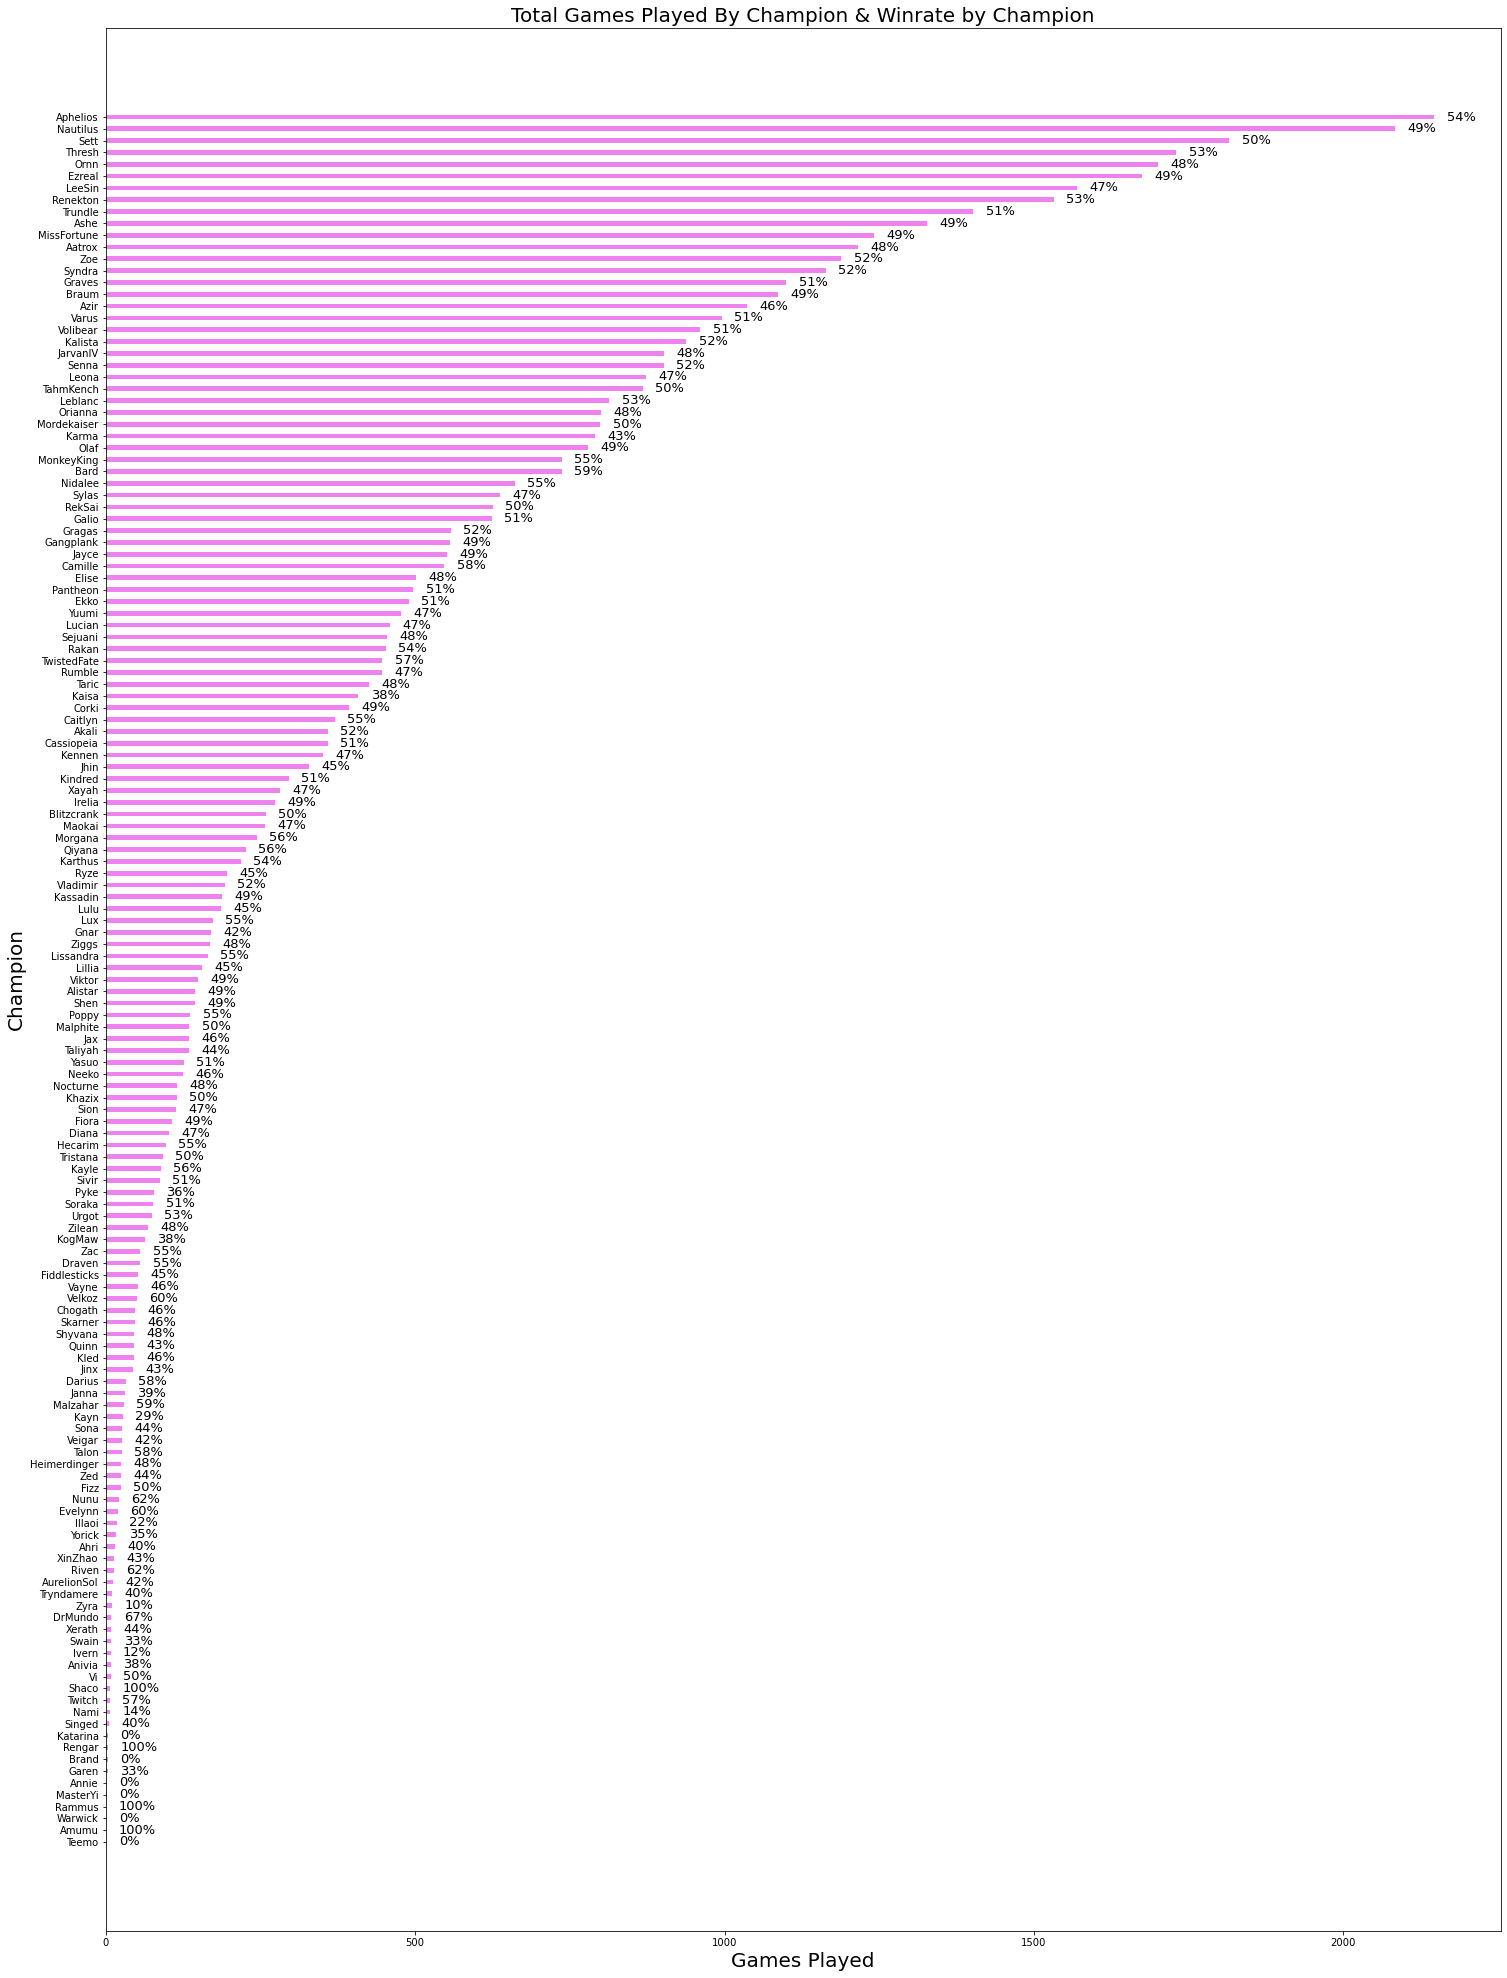

In [16]:


ind = np.arange(len(new['champ']))  # the x locations for the groups
width = .4  # the width of the bars

plt.figure(figsize=(25,35))
plt.barh(ind, new['totalplayed'], width,
                color='violet', label='Games Played')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Champion', size=20)
plt.xlabel('Games Played', size=20)
plt.title('Total Games Played By Champion & Winrate by Champion', size=20)
plt.yticks(ind, new['champ'])

for i, (p, pr) in enumerate(zip(new["winrate"], new["totalplayed"])):
    plt.text(s=('%.0f' % (p*100))+'%', x=(pr+20), y=i, color="black", verticalalignment="center", size=13)
    #plt.text(s=str(round(pr,0))+"%", x=pr-5, y=i, color="black",
             #verticalalignment="center", horizontalalignment="left", size=10)

plt.show()

### One Hot Encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
import tensorflow as tf
num_champions=150
champs_ = []
dic = {}
j=1
for col in df:
    if col != 'result':
        print(col)
        for i in range(len(df['bluetop'])):
            if(df[col][i] not in champs_):
                champs_.append(df[col][i])
                dic[df[col][i]] = j
                j = j + 1
                #print(df[col][i], j)
            

champs_.pop()
champs_.pop()
print(champs_)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
dic

In [ ]:

for col in df:
    if col != 'result':
        for i in range(len(df['bluetop'])):
            #print(df[col][i])
            df[col][i] = dic[df[col][i]]
            
df

In [ ]:
X = df

### Randomize SHuffle

In [ ]:
X=X.sample(frac=1)
X

### Sklearn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

results = X['result']
X = X.drop(axis=1,labels=['result'])

In [ ]:
X

### Tensorflow

In [ ]:
import tensorflow as tf
import sklearn

In [ ]:
r = random.randint(1, 100)

input_array = np.asarray(X.values).astype(np.float32)
target = np.asarray(results.values)

X_train, X_test, y_train, y_test = train_test_split(input_array, target, random_state=r)



In [ ]:
def fit_model():
    
    model = tf.keras.models.Sequential([tf.keras.layers.Embedding(148, 10, input_length=10),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(300, activation='tanh', 
                                                         kernel_initializer='uniform', 
                                                         bias_initializer='zeros'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(300, activation='tanh', 
                                                         kernel_initializer='uniform', 
                                                         bias_initializer='zeros'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(300, activation='tanh', 
                                                         kernel_initializer='uniform', 
                                                         bias_initializer='zeros'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(300, activation='tanh', 
                                                         kernel_initializer='uniform', 
                                                         bias_initializer='zeros'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=7, validation_split=.05)
    return model

In [ ]:
# fit all models
n_members = 10
members = [fit_model() for _ in range(n_members)]

In [ ]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = np.array(yhats)
    # sum across ensemble members
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    result = np.round(summed/len(members))#np.argmax(summed, axis=1)
    #print(result)
    return result

In [ ]:
# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
    # select a subset of members
    subset = members[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return sklearn.metrics.accuracy_score(testy, yhat)

In [ ]:
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(members)+1):
    # evaluate model with i members
    ensemble_score = evaluate_n_members(members, i, X_test, y_test)
    # evaluate the i'th model standalone
    #testy_enc = tf.keras.utils.to_categorical(y_test)
    _, single_score = members[i-1].evaluate(X_test, y_test, verbose=0)
    # summarize this step
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
# summarize average accuracy of a single final model
print('Accuracy %.3f (%.3f)' % (np.mean(single_scores), np.std(single_scores)))